# This notebook checks the input to ibmq_jakarta, particularly the phases in the pulse schedule that yield results in Figure 5
## The cell below is the pulse schedule that obtained results in Figure 5 . To verify that, we compare the phases in the rawdata input and the phases in the cell bellow. The values of phases in the input and the cell are identical for all 4 cases of \delta.

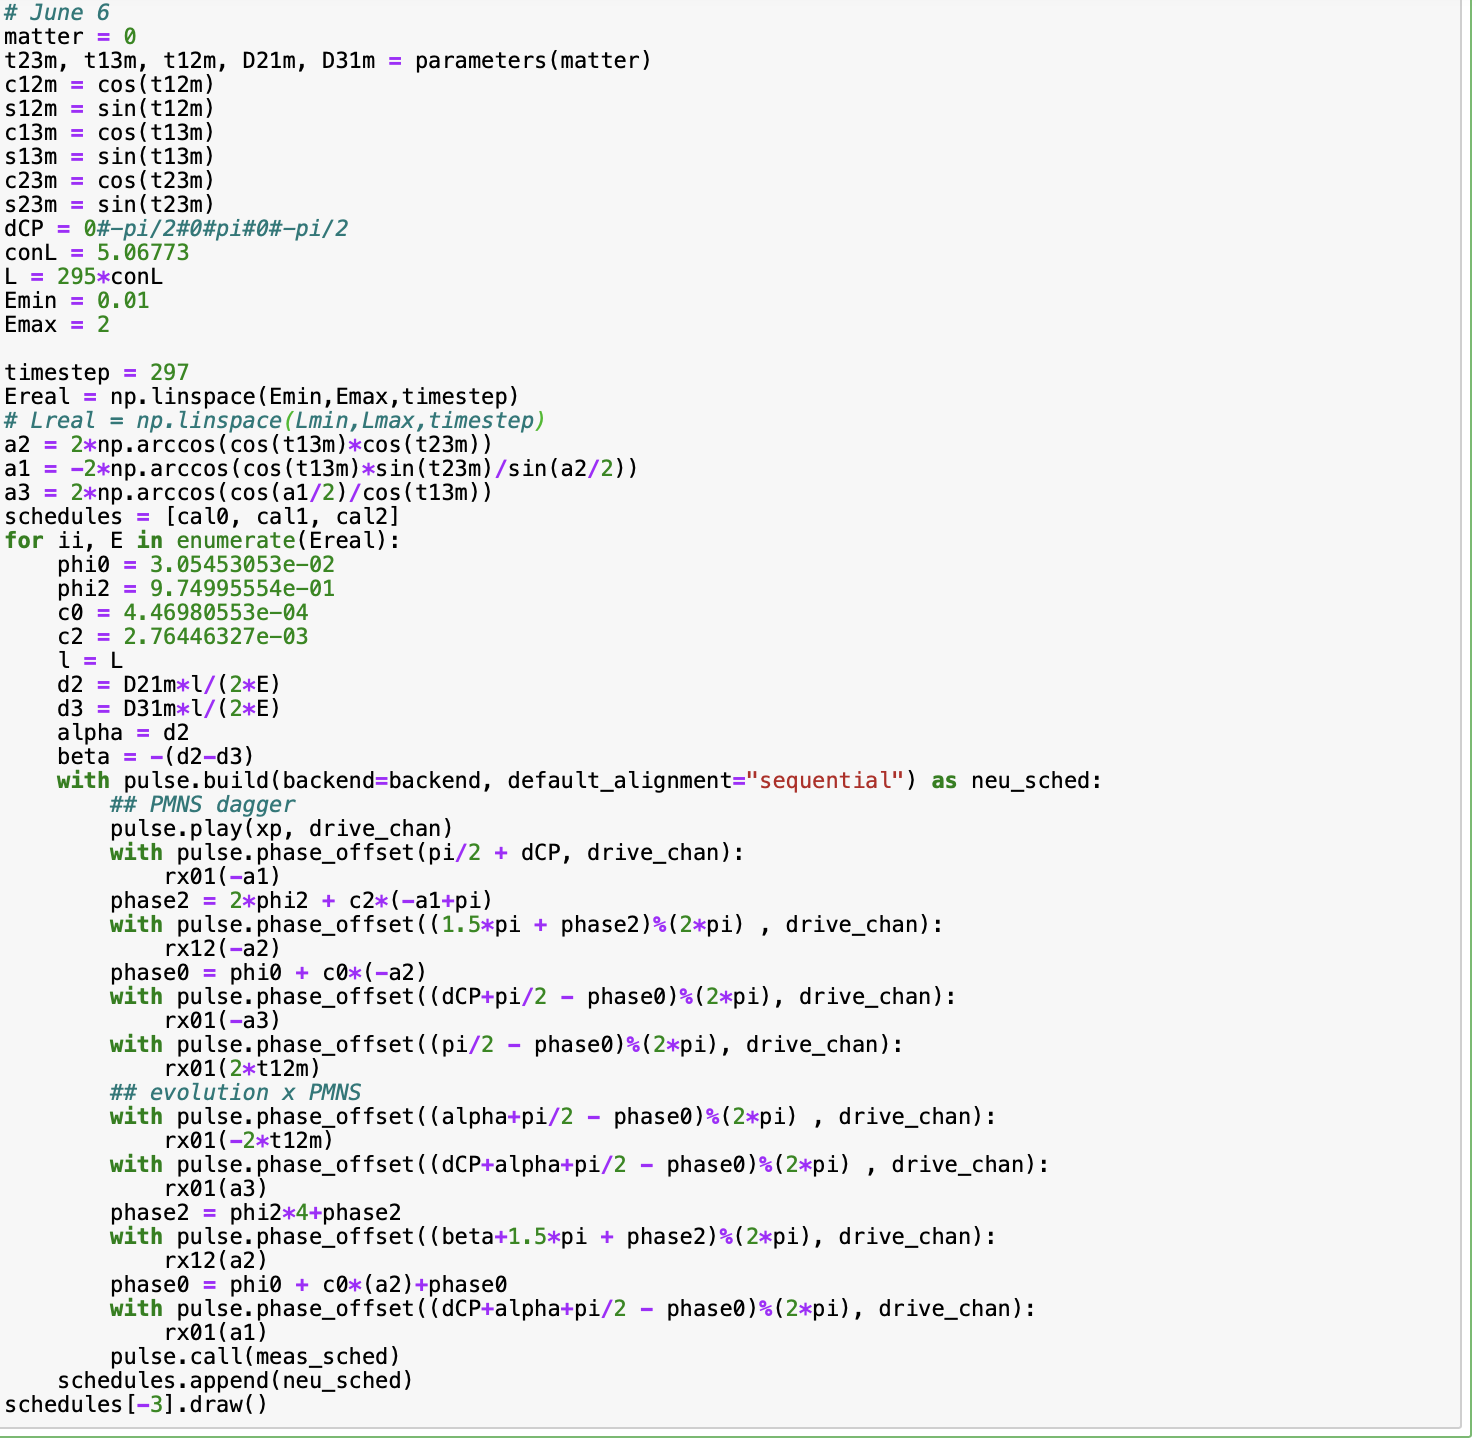

## Parameters according to the above schedule

In [1]:
import numpy as np
pi = np.pi
t12 = np.radians(33.45)
t23 = np.radians(42.1)
t13 = np.radians(8.62)
D21 = 7.42*1e-5
D31 = 2.510*1e-3 #
D32 = D31-D21 ###
phi0 = 3.05453053e-02
phi2 = 9.74995554e-01
c0 = 4.46980553e-04
c2 = 2.76446327e-03
conL = 5.06773
L = 295*conL
l = L
E = 2
d2 = D21*l/(2*E)
d3 = D31*l/(2*E)
alpha = d2
beta = -(d2-d3)
#
cos = np.cos
sin = np.sin
exp = np.exp
sqrt = np.sqrt
c12 = cos(t12)
s12 = sin(t12)
c13 = cos(t13)
s13 = sin(t13)
c23 = cos(t23)
s23 = sin(t23)

## Comparing the phases in the instructions sent to imbq_jakarta and the phases in the pulse schedule of the cell
## We compare the last circuit that corresponds to calculation with energy E=2

## Case $\delta=0$

In [2]:
# json file
import json

# Opening JSON file
f = open('CP_oscillations_rawdata/delta0-job1-629dd3fee66b1830084d25f7/629dd3fee66b1830084d25f7-input.json')

# returns JSON object as
# a dictionary
data = json.load(f)


In [3]:
# Checking len experiments:
len(data['experiments'])

300

In [4]:
# Phases according to schedule 
dCP = 0
print(pi/2 + dCP)
a2 = 2*np.arccos(cos(t13)*cos(t23))
a1 = -2*np.arccos(cos(t13)*sin(t23)/sin(a2/2))
a3 = 2*np.arccos(cos(a1/2)/cos(t13))
phase2 = 2*phi2 + c2*(-a1+pi)
print((1.5*pi + phase2)%(2*pi))
phase0 = phi0 + c0*(-a2)
print((dCP+pi/2 - phase0)%(2*pi))
print((pi/2 - phase0)%(2*pi))
print((alpha+pi/2 - phase0)%(2*pi))
print((dCP+alpha+pi/2 - phase0)%(2*pi))
phase2 = phi2*4+phase2
print((beta+1.5*pi + phase2)%(2*pi))
phase0 = phi0 + c0*(a2)+phase0
print((dCP+alpha+pi/2 - phase0)%(2*pi))

1.5707963267948966
0.389109091076671
1.540918989251
1.540918989251
1.5686508747435
1.5686508747435
5.1994595912091714
1.5374376016873965


In [5]:
data['experiments'][-1]['instructions']

[{'name': 'parametric_pulse',
  't0': 0,
  'ch': 'd0',
  'pulse_shape': 'drag',
  'parameters': {'duration': 160,
   'amp': [0.20003104249089076, 0.0],
   'sigma': 40,
   'beta': -0.9640752024969168}},
 {'name': 'fc', 't0': 160, 'ch': 'd0', 'phase': 1.5707963267948966},
 {'name': 'parametric_pulse',
  't0': 160,
  'ch': 'd0',
  'pulse_shape': 'drag',
  'parameters': {'duration': 160,
   'amp': [0.028317997561244923, 0.0],
   'sigma': 40,
   'beta': 0}},
 {'name': 'fc', 't0': 320, 'ch': 'd0', 'phase': -1.5707963267948966},
 {'name': 'fc', 't0': 320, 'ch': 'd0', 'phase': 0.389109091076671},
 {'name': 'd7576d7857e179888f3d63992ee029eb329859f334b9ba6017c5d8c834ccbb45',
  't0': 320,
  'ch': 'd0'},
 {'name': 'fc', 't0': 480, 'ch': 'd0', 'phase': -0.389109091076671},
 {'name': 'fc', 't0': 480, 'ch': 'd0', 'phase': 1.540918989251},
 {'name': 'parametric_pulse',
  't0': 480,
  'ch': 'd0',
  'pulse_shape': 'drag',
  'parameters': {'duration': 160,
   'amp': [-0.020932669774919383, 0.0],
   'sigm

## - The phases from the schedule are identical to the phases in the instruction that was sent to ibmq_jakarta 
## - Note that the comand phase_offset(phi) equals shift_phase(phi) the target pulse + shiftphase(-phi) afterward, so that it does not affect the following pulses. 
For example, see {'name': 'fc', 't0': 160, 'ch': 'd0', 'phase': 1.5707963267948966}, {'name': 'fc', 't0': 320, 'ch': 'd0', 'phase': -1.5707963267948966}. They come from phase_offset(pi/2).

# $\delta = \pi/2 $ schedule

In [6]:
# Python program to read
# json file

import json

# Opening JSON file
f = open('CP_oscillations_rawdata/deltaP2-job1-629dce99c62352186e9e31bf/629dce99c62352186e9e31bf-input.json')

# returns JSON object as
# a dictionary
data = json.load(f)


In [7]:
# Phases according to schedule 
dCP = pi/2
print(pi/2 + dCP)
a2 = 2*np.arccos(cos(t13)*cos(t23))
a1 = -2*np.arccos(cos(t13)*sin(t23)/sin(a2/2))
a3 = 2*np.arccos(cos(a1/2)/cos(t13))
phase2 = 2*phi2 + c2*(-a1+pi)
print((1.5*pi + phase2)%(2*pi))
phase0 = phi0 + c0*(-a2)
print((dCP+pi/2 - phase0)%(2*pi))
print((pi/2 - phase0)%(2*pi))
print((alpha+pi/2 - phase0)%(2*pi))
print((dCP+alpha+pi/2 - phase0)%(2*pi))
phase2 = phi2*4+phase2
print((beta+1.5*pi + phase2)%(2*pi))
phase0 = phi0 + c0*(a2)+phase0
print((dCP+alpha+pi/2 - phase0)%(2*pi))

3.141592653589793
0.389109091076671
3.111715316045897
1.540918989251
1.5686508747435
3.1394472015383967
5.1994595912091714
3.108233928482293


In [8]:
data['experiments'][-1]['instructions']

[{'name': 'parametric_pulse',
  't0': 0,
  'ch': 'd0',
  'pulse_shape': 'drag',
  'parameters': {'duration': 160,
   'amp': [0.20003104249089076, 0.0],
   'sigma': 40,
   'beta': -0.9640752024969168}},
 {'name': 'fc', 't0': 160, 'ch': 'd0', 'phase': 3.141592653589793},
 {'name': 'parametric_pulse',
  't0': 160,
  'ch': 'd0',
  'pulse_shape': 'drag',
  'parameters': {'duration': 160,
   'amp': [0.028317997561244923, 0.0],
   'sigma': 40,
   'beta': 0}},
 {'name': 'fc', 't0': 320, 'ch': 'd0', 'phase': -3.141592653589793},
 {'name': 'fc', 't0': 320, 'ch': 'd0', 'phase': 0.389109091076671},
 {'name': 'd7576d7857e179888f3d63992ee029eb329859f334b9ba6017c5d8c834ccbb45',
  't0': 320,
  'ch': 'd0'},
 {'name': 'fc', 't0': 480, 'ch': 'd0', 'phase': -0.389109091076671},
 {'name': 'fc', 't0': 480, 'ch': 'd0', 'phase': 3.111715316045897},
 {'name': 'parametric_pulse',
  't0': 480,
  'ch': 'd0',
  'pulse_shape': 'drag',
  'parameters': {'duration': 160,
   'amp': [-0.020932669774919383, 0.0],
   'sig

# $\delta=\pi$ schedule

In [9]:
# Python program to read
# json file

import json

# Opening JSON file
f = open('CP_oscillations_rawdata/deltaPi-job1-629dd369a70e33c7b260a510/629dd369a70e33c7b260a510-input.json')

# returns JSON object as
# a dictionary
data = json.load(f)

In [10]:
# Phases according to schedule 
dCP = pi
print(pi/2 + dCP)
a2 = 2*np.arccos(cos(t13)*cos(t23))
a1 = -2*np.arccos(cos(t13)*sin(t23)/sin(a2/2))
a3 = 2*np.arccos(cos(a1/2)/cos(t13))
phase2 = 2*phi2 + c2*(-a1+pi)
print((1.5*pi + phase2)%(2*pi))
phase0 = phi0 + c0*(-a2)
print((dCP+pi/2 - phase0)%(2*pi))
print((pi/2 - phase0)%(2*pi))
print((alpha+pi/2 - phase0)%(2*pi))
print((dCP+alpha+pi/2 - phase0)%(2*pi))
phase2 = phi2*4+phase2
print((beta+1.5*pi + phase2)%(2*pi))
phase0 = phi0 + c0*(a2)+phase0
print((dCP+alpha+pi/2 - phase0)%(2*pi))

4.71238898038469
0.389109091076671
4.682511642840793
1.540918989251
1.5686508747435
4.710243528333293
5.1994595912091714
4.67903025527719


In [11]:
data['experiments'][-1]['instructions']

[{'name': 'parametric_pulse',
  't0': 0,
  'ch': 'd0',
  'pulse_shape': 'drag',
  'parameters': {'duration': 160,
   'amp': [0.20003104249089076, 0.0],
   'sigma': 40,
   'beta': -0.9640752024969168}},
 {'name': 'fc', 't0': 160, 'ch': 'd0', 'phase': 4.71238898038469},
 {'name': 'parametric_pulse',
  't0': 160,
  'ch': 'd0',
  'pulse_shape': 'drag',
  'parameters': {'duration': 160,
   'amp': [0.028317997561244923, 0.0],
   'sigma': 40,
   'beta': 0}},
 {'name': 'fc', 't0': 320, 'ch': 'd0', 'phase': -4.71238898038469},
 {'name': 'fc', 't0': 320, 'ch': 'd0', 'phase': 0.389109091076671},
 {'name': 'd7576d7857e179888f3d63992ee029eb329859f334b9ba6017c5d8c834ccbb45',
  't0': 320,
  'ch': 'd0'},
 {'name': 'fc', 't0': 480, 'ch': 'd0', 'phase': -0.389109091076671},
 {'name': 'fc', 't0': 480, 'ch': 'd0', 'phase': 4.682511642840793},
 {'name': 'parametric_pulse',
  't0': 480,
  'ch': 'd0',
  'pulse_shape': 'drag',
  'parameters': {'duration': 160,
   'amp': [-0.020932669774919383, 0.0],
   'sigma

# $\delta=-\pi/2$

In [12]:
# Python program to read
# json file

import json

# Opening JSON file
f = open('CP_oscillations_rawdata/deltaminusPi2-job2-629dd459d624be2739c8be38/629dd459d624be2739c8be38-input.json')

# returns JSON object as
# a dictionary
data = json.load(f)


In [13]:
# Phases according to schedule 
dCP = -pi/2
print(pi/2 + dCP)
a2 = 2*np.arccos(cos(t13)*cos(t23))
a1 = -2*np.arccos(cos(t13)*sin(t23)/sin(a2/2))
a3 = 2*np.arccos(cos(a1/2)/cos(t13))
phase2 = 2*phi2 + c2*(-a1+pi)
print((1.5*pi + phase2)%(2*pi))
phase0 = phi0 + c0*(-a2)
print((dCP+pi/2 - phase0)%(2*pi))
print((pi/2 - phase0)%(2*pi))
print((alpha+pi/2 - phase0)%(2*pi))
print((dCP+alpha+pi/2 - phase0)%(2*pi))
phase2 = phi2*4+phase2
print((beta+1.5*pi + phase2)%(2*pi))
phase0 = phi0 + c0*(a2)+phase0
print((dCP+alpha+pi/2 - phase0)%(2*pi))

0.0
0.389109091076671
6.2533079696356895
1.540918989251
1.5686508747435
6.281039855128189
5.1994595912091714
6.249826582072086


In [14]:
data['experiments'][-1]['instructions']

[{'name': 'parametric_pulse',
  't0': 0,
  'ch': 'd0',
  'pulse_shape': 'drag',
  'parameters': {'duration': 160,
   'amp': [0.20003104249089076, 0.0],
   'sigma': 40,
   'beta': -0.9640752024969168}},
 {'name': 'fc', 't0': 160, 'ch': 'd0', 'phase': 0.0},
 {'name': 'parametric_pulse',
  't0': 160,
  'ch': 'd0',
  'pulse_shape': 'drag',
  'parameters': {'duration': 160,
   'amp': [0.028317997561244923, 0.0],
   'sigma': 40,
   'beta': 0}},
 {'name': 'fc', 't0': 320, 'ch': 'd0', 'phase': -0.0},
 {'name': 'fc', 't0': 320, 'ch': 'd0', 'phase': 0.389109091076671},
 {'name': 'd7576d7857e179888f3d63992ee029eb329859f334b9ba6017c5d8c834ccbb45',
  't0': 320,
  'ch': 'd0'},
 {'name': 'fc', 't0': 480, 'ch': 'd0', 'phase': -0.389109091076671},
 {'name': 'fc', 't0': 480, 'ch': 'd0', 'phase': 6.2533079696356895},
 {'name': 'parametric_pulse',
  't0': 480,
  'ch': 'd0',
  'pulse_shape': 'drag',
  'parameters': {'duration': 160,
   'amp': [-0.020932669774919383, 0.0],
   'sigma': 40,
   'beta': 0}},
 {

# Phase advances in Figure 5 pulse schedules

## Phase compensation in the cell:

In [15]:
a2 = 2*np.arccos(cos(t13)*cos(t23))
a1 = -2*np.arccos(cos(t13)*sin(t23)/sin(a2/2))
a3 = 2*np.arccos(cos(a1/2)/cos(t13))
phase2 = 2*phi2 + c2*(-a1+pi)
print(( + phase2)%(2*pi))
phase0 = phi0 + c0*(-a2)
print(( - phase0)%(2*pi))
print((- phase0)%(2*pi))
print(( - phase0)%(2*pi))
print(( - phase0)%(2*pi))
phase2 = phi2*4+phase2
print(( + phase2)%(2*pi))
phase0 = phi0 + c0*(a2)+phase0
print(( - phase0)%(2*pi))

1.9599054178715678
6.2533079696356895
6.2533079696356895
6.2533079696356895
6.2533079696356895
5.859887633871568
6.222094696579586


## The phases advanced tracked is the minus values of these phases above: 

In [16]:
- 1.9599054178715678 

-1.9599054178715678

In [17]:
-6.2533079696356895 + 2*pi

0.029877337543896765

In [18]:
-6.222094696579586 + 2*pi

0.061090610599999984

## The values is the same as provided in the paper:
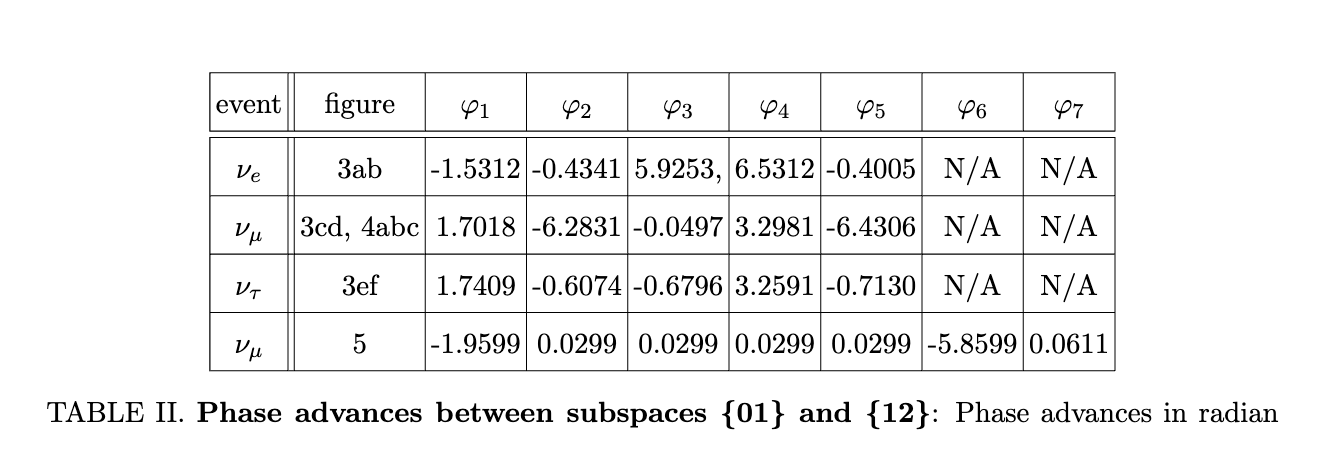

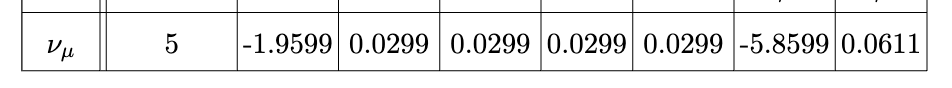